In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold


In [3]:
data = pd.read_csv("house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
# Verificando colunas
categoricas = data.select_dtypes(include=['object']).columns
nao_categ = data.select_dtypes(exclude=['object']).columns
print(categoricas), print(nao_categ)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 

(None, None)

In [5]:
# Ignorando variaveis categóricas
houses = data.drop(columns=['Id', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

In [6]:
# Total de nulos
houses.isna().sum().sum()

2137

In [7]:
houses.shape

(2919, 37)

In [8]:
# Dropando nulos - Medida extrema, realizada apenas neste exercício
houses_clean = houses.dropna()

In [9]:
# Base sem nulos
houses_clean.isna().sum().sum()

0

In [10]:
# Setando features e target
X = houses_clean.drop(columns='SalePrice')
y = houses_clean['SalePrice']

In [11]:
# Usando EN, KFold e CV

n = 5
en = ElasticNet()

kf = KFold(n_splits=n, shuffle=True, random_state=42)
result_cv = cross_validate(
  estimator=en, X=X, y=y, cv=kf,
  scoring="r2",
  return_train_score=True
)

c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.482e+11, tolerance: 5.920e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.135e+11, tolerance: 6.231e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.580e+11, tolerance: 6.196e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\henrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.483e+11, tolerance: 6.448e+08
  model = cd_fast.enet_coordinate_descent(


In [16]:
df_result_cv = pd.DataFrame(result_cv)
df_result_cv = df_result_cv.abs()
df_result_cv

,fit_time,score_time,test_score,train_score
0,0.080758,0.004987,0.796859,0.790648
1,0.075361,0.005984,0.860563,0.777367
2,0.080627,0.002995,0.770657,0.797482
3,0.087333,0.005212,0.741161,0.796243
4,0.107037,0.002993,0.385493,0.836860


In [14]:
df_result_cv[["test_score", "train_score"]].describe().T

,count,mean,std,min,25%,50%,75%,max
test_score,5.0,0.710947,0.187193,0.385493,0.741161,0.770657,0.796859,0.860563
train_score,5.0,0.799720,0.022240,0.777367,0.790648,0.796243,0.797482,0.836860


<Axes: xlabel='train_score', ylabel='Count'>

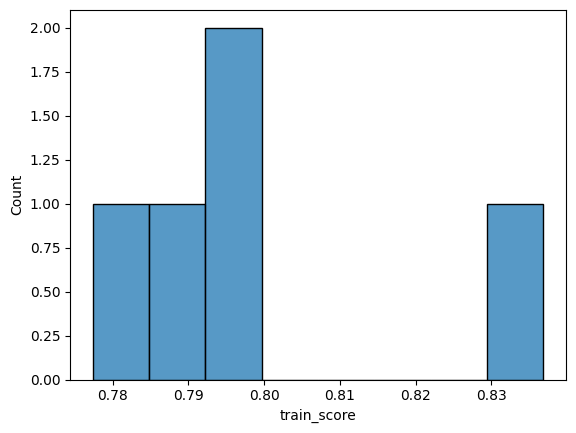

In [18]:
sns.histplot(data=df_result_cv, x="train_score")

<Axes: xlabel='test_score', ylabel='Count'>

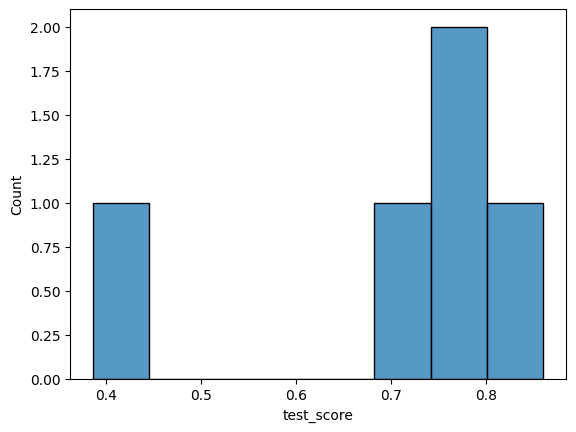

In [19]:
sns.histplot(data=df_result_cv, x="test_score")